In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data=pd.read_csv('../Assignment1//dataset_mood_smartphone.csv')
data.set_index(data.columns[0],inplace=True)
data.reset_index(inplace=True)
data.index += 1
data.head(5)

,Unnamed: 0,id,time,variable,value
1,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
4,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
5,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


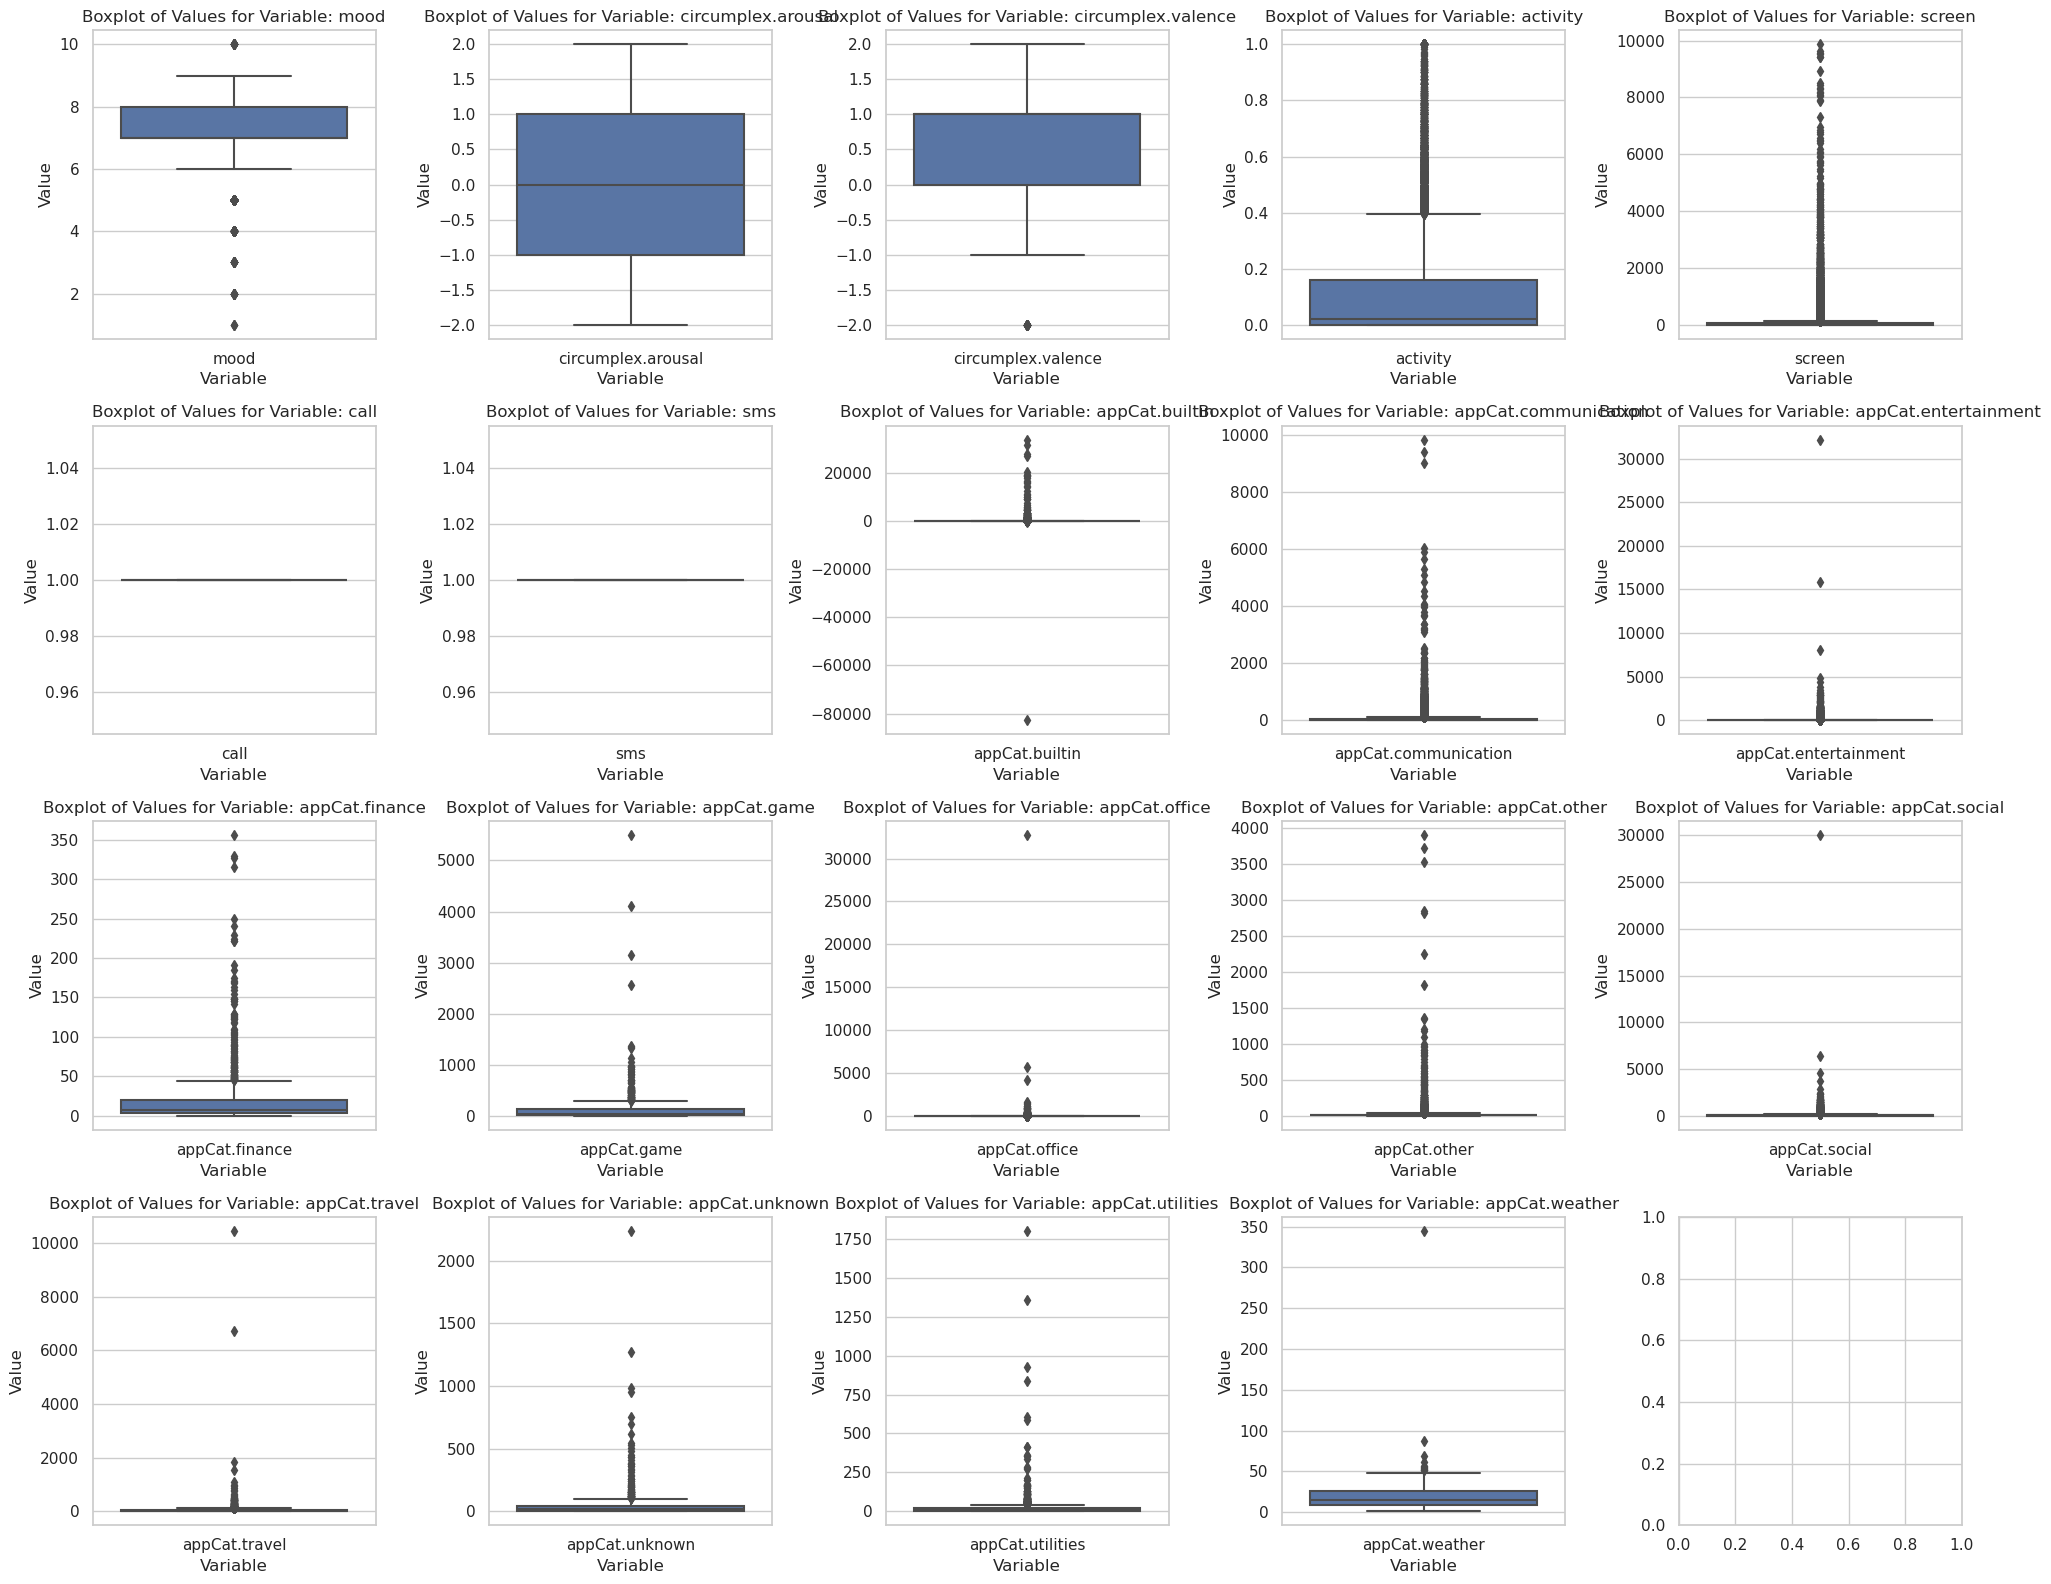

In [12]:
# Plot boxplots grouped by 'variable'
variables = data['variable'].unique()
n_rows = (len(variables) - 1) // 5 + 1
fig, axs = plt.subplots(n_rows, 5, figsize=(20, 4*n_rows))

for i, variable in enumerate(variables):
    row = i // 5
    col = i % 5
    sns.boxplot(data=data[data['variable'] == variable], x='variable', y='value', ax=axs[row, col])
    axs[row, col].set_title('Boxplot of Values for Variable: {}'.format(variable))
    axs[row, col].set_xlabel('Variable')
    axs[row, col].set_ylabel('Value')

plt.tight_layout()
plt.show()